In [ ]:
## EDA 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\sam\End-to-End-Fashion-Recommendation-System-with-MLOps\Data_set\Amazon_Aesthetic_web_scrape.csv')
df.head(5)

,asin,product_name,price,rating,review_count,discount,image_url,product_link,aesthetic
0,B0FHDHSFYY,Men's Half Sleeve Round Neck Cottonblend Graph...,286.0,4.0,446,(74% off),https://m.media-amazon.com/images/I/61WYx598KK...,https://www.amazon.in/LEOTUDE-Cottonblend-Grap...,streetwear
1,B0FK5PK4VG,Half Sleeve Oversized Cottonblend Round Neck D...,298.0,4.0,405,(73% off),https://m.media-amazon.com/images/I/61AE3iKBYP...,https://www.amazon.in/LEOTUDE-Oversized-Graphi...,streetwear
2,B0F99NP71S,Men Half Sleeve Round Neck Graphic Font Printe...,286.0,4.2,215,(74% off),https://m.media-amazon.com/images/I/61EbiUi7r1...,https://www.amazon.in/LEOTUDE-Graphic-Cottonbl...,streetwear
3,B0FK5GC8XD,Casual Half Sleeve Cottonblend Printed Round N...,286.0,4.1,198,(74% off),https://m.media-amazon.com/images/I/61kYmRqjza...,https://www.amazon.in/LEOTUDE-Cottonblend-Shou...,streetwear
4,B0FQ5NLPK3,Oversized Full Sleeve Cottonblend Graphic Prin...,298.0,3.9,183,(73% off),https://m.media-amazon.com/images/I/615EMy4vdm...,https://www.amazon.in/LEOTUDE-Stylist-Cottonbl...,streetwear


In [3]:
len(df.product_name) - df.product_name.nunique()

6587

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 16364 entries, 0 to 16363
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          16364 non-null  str    
 1   product_name  16364 non-null  str    
 2   price         16247 non-null  float64
 3   rating        12342 non-null  float64
 4   review_count  12342 non-null  str    
 5   discount      15327 non-null  str    
 6   image_url     16364 non-null  str    
 7   product_link  16364 non-null  str    
 8   aesthetic     16364 non-null  str    
dtypes: float64(2), str(7)
memory usage: 1.1 MB


In [6]:
df.isna().sum()

asin               0
product_name       0
price            117
rating          4022
review_count    4022
discount        1037
image_url          0
product_link       0
aesthetic          0
dtype: int64

In [7]:
##Percentage of the missing values 

(df.isna().sum()/len(df))*100

asin             0.000000
product_name     0.000000
price            0.714984
rating          24.578343
review_count    24.578343
discount         6.337081
image_url        0.000000
product_link     0.000000
aesthetic        0.000000
dtype: float64

In [8]:
##drop dupilicates 

print(f"Before: {df.shape}")

# drop by ASIN — keeps first occurrence
df = df.drop_duplicates(subset='asin', keep='first')

print(f"After:  {df.shape}")
print(f"Removed: {6587} rows")

Before: (16364, 9)
After:  (13813, 9)
Removed: 6587 rows


In [9]:
print(df['aesthetic'].value_counts())
print()
print(df['aesthetic'].value_counts(normalize=True).round(3) * 100)

aesthetic
old_money         2581
office_smart      2192
college_casual    2019
gym_athleisure    2001
streetwear        1927
date_clean        1631
y2k_party         1462
Name: count, dtype: int64

aesthetic
old_money         18.7
office_smart      15.9
college_casual    14.6
gym_athleisure    14.5
streetwear        14.0
date_clean        11.8
y2k_party         10.6
Name: proportion, dtype: float64


In [10]:
import matplotlib.pyplot as plt


(array([ 226.,  199., 1322., 5834., 2713.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

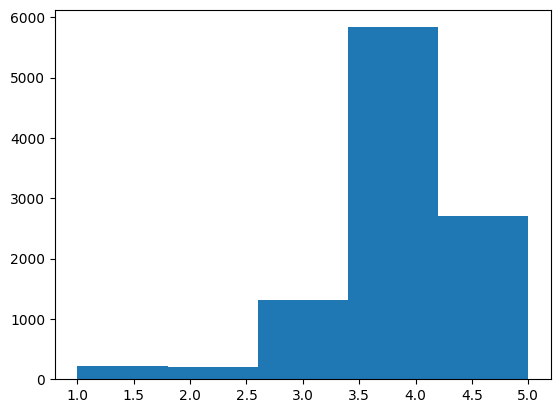

In [11]:
plt.hist(df.rating,bins=5)

In [12]:
df.info()

<class 'pandas.DataFrame'>
Index: 13813 entries, 0 to 16361
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          13813 non-null  str    
 1   product_name  13813 non-null  str    
 2   price         13705 non-null  float64
 3   rating        10294 non-null  float64
 4   review_count  10294 non-null  str    
 5   discount      12900 non-null  str    
 6   image_url     13813 non-null  str    
 7   product_link  13813 non-null  str    
 8   aesthetic     13813 non-null  str    
dtypes: float64(2), str(7)
memory usage: 1.1 MB


In [13]:
df.aesthetic.unique()

<StringArray>
[    'streetwear', 'college_casual',      'old_money',     'date_clean',
 'gym_athleisure',      'y2k_party',   'office_smart']
Length: 7, dtype: str

In [14]:
df.describe()

,price,rating
count,13705.000000,10294.000000
mean,1453.615469,3.855139
std,2633.374094,0.694298
min,79.000000,1.000000
25%,499.000000,3.600000
50%,799.000000,3.900000
75%,1399.000000,4.200000
max,59503.000000,5.000000


In [15]:
print(df.price.min())
print(df.price.max())

79.0
59503.0


In [22]:
df.loc[6201, "product_link"]

'https://www.amazon.in/Club-Monaco-Summer-Jacket-Marine/dp/B0C1HSZ3VW'

In [24]:
df[df['price'] > 10000]

,asin,product_name,price,rating,review_count,discount,image_url,product_link,aesthetic
789,B0BLK5G7BQ,unisex-adult Men Hooded Sweatshirt,12582.0,4.7,242,NaN,https://m.media-amazon.com/images/I/61P4WVtBTh...,https://www.amazon.in/Aelfric-Eden-Oversized-S...,streetwear
946,B082MZGVLW,Men's Kingpin Skate Shoe,13370.0,4.6,828,NaN,https://m.media-amazon.com/images/I/81A9VjqxHo...,https://www.amazon.in/Etnies-mens-Kingpin-Skat...,streetwear
1893,B0GFMT3WFQ,| KING Men's Oversized Full-Zip Hoodie | Black...,10999.0,NaN,NaN,NaN,https://m.media-amazon.com/images/I/510-quxqgm...,https://www.amazon.in/PUMA-Oversized-Full-Zip-...,streetwear
1894,B0GFN7CL38,| KING Men's Oversized Full-Zip Hoodie | Black...,10999.0,NaN,NaN,NaN,https://m.media-amazon.com/images/I/510-quxqgm...,https://www.amazon.in/PUMA-Oversized-Full-Zip-...,streetwear
1895,B0GFN76H62,| KING Men's Oversized Full-Zip Hoodie | Black...,10999.0,NaN,NaN,NaN,https://m.media-amazon.com/images/I/510-quxqgm...,https://www.amazon.in/PUMA-Oversized-Full-Zip-...,streetwear
...,...,...,...,...,...,...,...,...,...
15613,B082F1SV1R,Men's Penny Loafer,14748.0,4.4,794,NaN,https://m.media-amazon.com/images/I/71oafrs94n...,https://www.amazon.in/Nunn-Bush-Penny-Loafer-8...,office_smart
15619,B072R3SDCM,Men's Loafers Gold Buckle Fashion Handmade Wed...,13218.0,4.6,3.2K,NaN,https://m.media-amazon.com/images/I/61-Cmuwg1y...,https://www.amazon.in/ELANROMAN-Wedding-Loafer...,office_smart
15632,B07QRMTVKV,"Men's, Tazewell Loafer",11970.0,4.5,3.2K,NaN,https://m.media-amazon.com/images/I/81Bh2CcunN...,https://www.amazon.in/STACY-ADAMS-Tazewell-Tas...,office_smart
15642,B07658NKZV,Mens Lawton Slip Resistant Work Dress Loafer Shoe,13443.0,3.8,2K,NaN,https://m.media-amazon.com/images/I/51zBEZGj6T...,https://www.amazon.in/dockers-Lawton-Resistant...,office_smart
